# Sub task 1.1: Tìm hiểu các trúc dữ liệu

In [1]:
import pandas as pd # Standard import
import numpy as np
from datetime import datetime

data_path = '/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/e-commerce data.csv'

# Load dữ liệu
df = pd.read_csv(data_path, encoding='latin-1')

print("✓ Dữ liệu đã được tải thành công")

✓ Dữ liệu đã được tải thành công


In [2]:
import chardet

with open(data_path, 'rb') as f:
    result = chardet.detect(f.read(500000))  # đọc 500KB đầu tiên
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Câu 1: Kích thước Dataset

In [4]:
rows, cols = df.shape
print(f"📊 Dataset có: {rows:,} rows x {cols} columns")

📊 Dataset có: 541,909 rows x 8 columns


Tổng số transaction bằng tống số dòng là khoảng 541 909 dòng dữ liệu

## Câu 2: Tên cột và kiểu dữ liệu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Kiểm tra tên cột và kiểu dữ liệu
print("📋 Tên cột và kiểu dữ liệu:\n")
print(df.dtypes)

📋 Tên cột và kiểu dữ liệu:

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


## Câu 3: Kiểm tra data thời gian

Nhận thấy dữ liệu Invoicedate dang ở dạng obj nên chuyển thành datetime

In [6]:
# change InvoiceDate to datetime 12/1/2010 11:57
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [7]:
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

min_date, max_date

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

Dữ liệu nằm trong khoảng ngày xxx 2010 - xxxx 2011

# Subtask 1.2 Data Validation

In [8]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Kiểm tra Quantity > 0  UnitPrice > 0 ?

In [10]:
# 1. Kiểm tra Quantity
print("--- Kiểm tra Quantity ---")
negative_quantity = df[df['Quantity'] <= 0]
print(f"Số lượng dòng có Quantity <= 0: {len(negative_quantity)} ({len(negative_quantity)/len(df)*100:.2f}%)")

# Kiểm tra xem Quantity âm có phải là đơn hủy (InvoiceNo chứa 'C') không
cancelled_orders = negative_quantity['InvoiceNo'].str.contains('C', na=False).sum()
print(f"Trong đó số lượng đơn hàng có InvoiceNo chứa 'C' (Cancelled): {cancelled_orders}")

# 2. Kiểm tra UnitPrice
print("\n--- Kiểm tra UnitPrice ---")
invalid_price = df[df['UnitPrice'] <= 0]
print(f"Số lượng dòng có UnitPrice <= 0: {len(invalid_price)} ({len(invalid_price)/len(df)*100:.2f}%)")
print(f" - UnitPrice < 0: {(df['UnitPrice'] < 0).sum()}")
print(f" - UnitPrice = 0: {(df['UnitPrice'] == 0).sum()}")

# Hiển thị một vài ví dụ
print("\n--- Ví dụ dữ liệu Quantity <= 0 ---")
display(negative_quantity[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID']].head())

print("\n--- Ví dụ dữ liệu UnitPrice <= 0 ---")
display(invalid_price[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID']].head())

--- Kiểm tra Quantity ---
Số lượng dòng có Quantity <= 0: 10624 (1.96%)
Trong đó số lượng đơn hàng có InvoiceNo chứa 'C' (Cancelled): 9288

--- Kiểm tra UnitPrice ---
Số lượng dòng có UnitPrice <= 0: 2517 (0.46%)
 - UnitPrice < 0: 2
 - UnitPrice = 0: 2515

--- Ví dụ dữ liệu Quantity <= 0 ---


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID
141,C536379,D,Discount,-1,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0



--- Ví dụ dữ liệu UnitPrice <= 0 ---


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID
622,536414,22139,NaN,56,0.0,NaN
1970,536545,21134,NaN,1,0.0,NaN
1971,536546,22145,NaN,1,0.0,NaN
1972,536547,37509,NaN,1,0.0,NaN
1987,536549,85226A,NaN,1,0.0,NaN


### Nhận xét về dữ liệu Quantity và UnitPrice:

1.  **Quantity <= 0**:
    *   Có một lượng đáng kể các dòng có `Quantity` âm.
    *   Đa số các trường hợp này thường đi kèm với `InvoiceNo` bắt đầu bằng chữ 'C', biểu thị cho các đơn hàng bị hủy (Cancelled transactions).
    *   Tuy nhiên, cũng có thể tồn tại các trường hợp điều chỉnh kho hoặc lỗi khác không phải đơn hủy, hoặc hàng trả về làm ảnh hưởng xấu tới doanh thu

2.  **UnitPrice <= 0**:
    *   Các trường hợp `UnitPrice = 0` thường là quà tặng, hàng mẫu, hoặc lỗi nhập liệu (không có giá).
    *   Các trường hợp `UnitPrice < 0` (nếu có) thường rất hiếm và thường liên quan đến việc điều chỉnh nợ xấu (Bad Debt Adjustment) Hoặc tìm hiểu trên kaggle là hàng được trả về, các sản phẩm miễn phí đặt chung với các sản phẩm khác

**Hành động đề xuất:**
*   Đối với bài toán phân tích doanh thu bán hàng thông thường, chúng ta nên **loại bỏ** các dòng có `Quantity <= 0` (đơn hủy) và `UnitPrice <= 0` để tránh làm sai lệch kết quả tính toán doanh thu.
*   Tuy nhiên, nếu bài toán yêu cầu phân tích tỷ lệ hủy đơn, ta cần giữ lại các dòng `Quantity < 0`.

--- Phân tích Outliers cho Quantity và UnitPrice ---

=== Thống kê Quantity ===
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

=== Thống kê UnitPrice ===
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


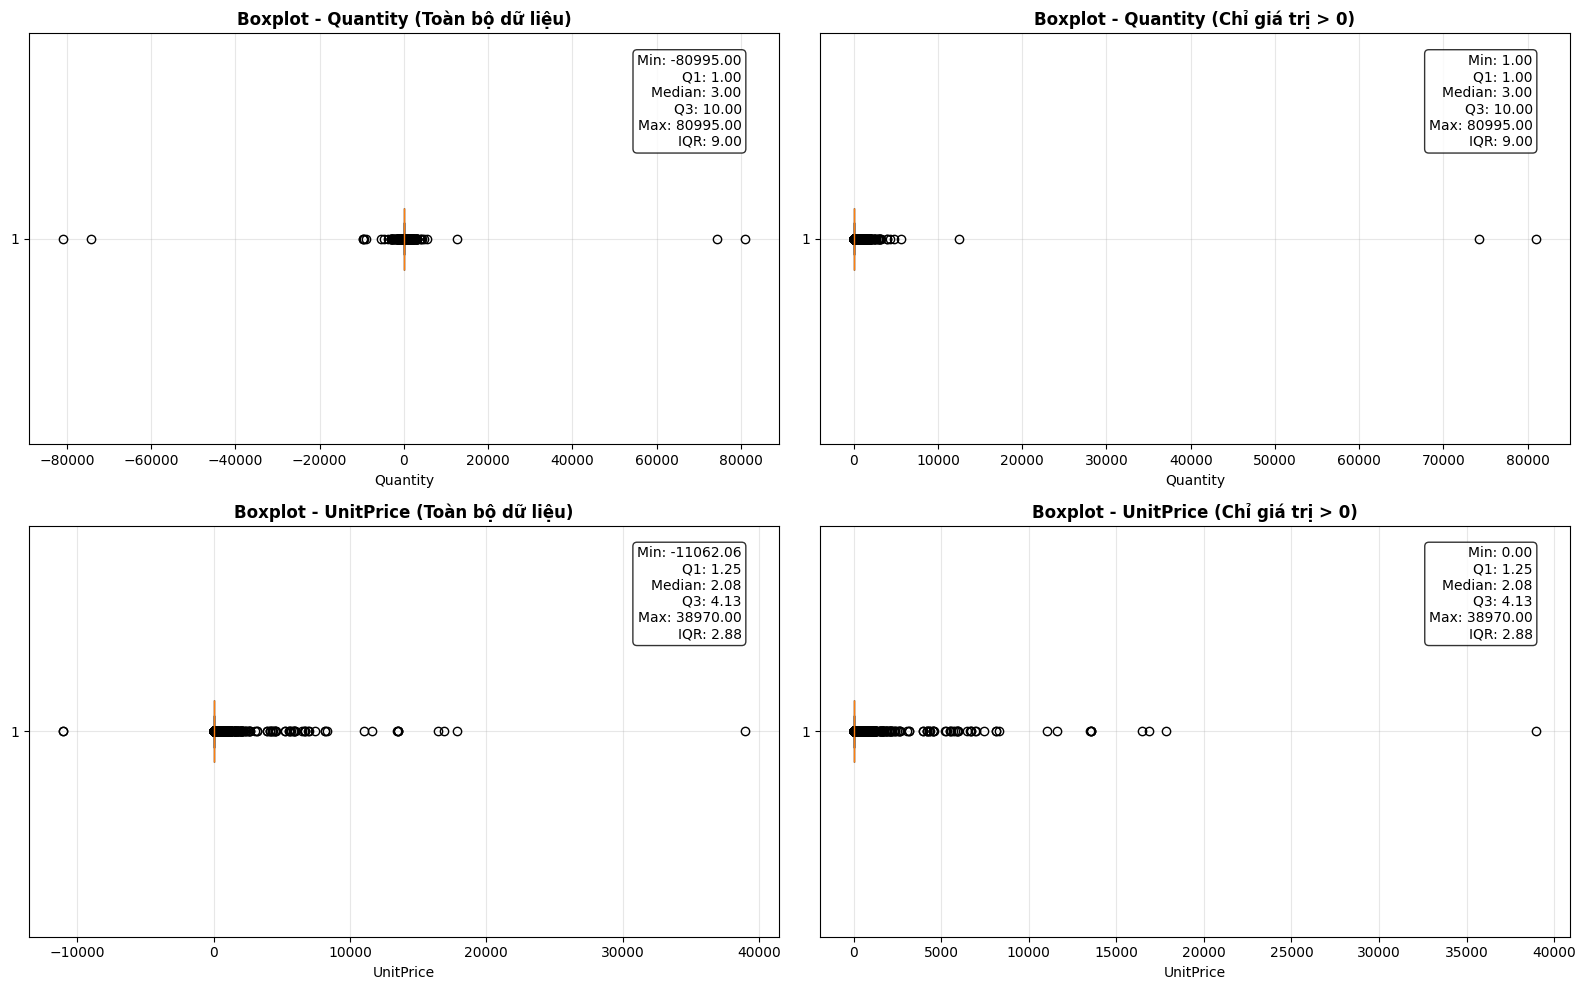


--- Outliers theo phương pháp IQR (Quantity) ---
  - Ngưỡng dưới (Lower Bound): -12.50
  - Ngưỡng trên (Upper Bound): 23.50
  - Số lượng outliers: 58619 (10.82%)

--- Outliers theo phương pháp IQR (UnitPrice) ---
  - Ngưỡng dưới (Lower Bound): -3.07
  - Ngưỡng trên (Upper Bound): 8.45
  - Số lượng outliers: 39627 (7.31%)

✅ Hoàn tất phân tích Outliers!


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subtask 1.3b: Phân tích Outliers cho Quantity và UnitPrice
print("--- Phân tích Outliers cho Quantity và UnitPrice ---\n")

# Tính toán thống kê mô tả
print("=== Thống kê Quantity ===")
print(df['Quantity'].describe())

print("\n=== Thống kê UnitPrice ===")
print(df['UnitPrice'].describe())

# Hàm vẽ boxplot với chú thích
def plot_boxplot_with_stats(data, ax, title, xlabel):
    box = ax.boxplot(data, vert=False, patch_artist=True)
    
    # Tính toán các chỉ số
    quantiles = data.quantile([0.25, 0.5, 0.75])
    q1, median, q3 = quantiles[0.25], quantiles[0.5], quantiles[0.75]
    iqr = q3 - q1
    min_val = data.min()
    max_val = data.max()
    
    # Trang trí boxplot
    for patch in box['boxes']:
        patch.set_facecolor('lightblue')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.grid(True, alpha=0.3)
    
    # Thêm text chú thích lên biểu đồ
    stats_text = (
        f'Min: {min_val:.2f}\n'
        f'Q1: {q1:.2f}\n'
        f'Median: {median:.2f}\n'
        f'Q3: {q3:.2f}\n'
        f'Max: {max_val:.2f}\n'
        f'IQR: {iqr:.2f}'
    )
    
    # Đặt text box ở góc phải trên
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Vẽ Boxplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Boxplot cho Quantity (toàn bộ)
plot_boxplot_with_stats(df['Quantity'], axes[0, 0], 'Boxplot - Quantity (Toàn bộ dữ liệu)', 'Quantity')

# Boxplot cho Quantity (lọc dữ liệu dương)
plot_boxplot_with_stats(df[df['Quantity'] > 0]['Quantity'], axes[0, 1], 'Boxplot - Quantity (Chỉ giá trị > 0)', 'Quantity')

# Boxplot cho UnitPrice (toàn bộ)
plot_boxplot_with_stats(df['UnitPrice'], axes[1, 0], 'Boxplot - UnitPrice (Toàn bộ dữ liệu)', 'UnitPrice')

# Boxplot cho UnitPrice (lọc dữ liệu dương)
plot_boxplot_with_stats(df[df['UnitPrice'] > 0]['UnitPrice'], axes[1, 1], 'Boxplot - UnitPrice (Chỉ giá trị > 0)', 'UnitPrice')

plt.tight_layout()
plt.show()

# Đếm số lượng outliers theo phương pháp IQR
def count_outliers_iqr(data, column_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\n--- Outliers theo phương pháp IQR ({column_name}) ---")
    print(f"  - Ngưỡng dưới (Lower Bound): {lower_bound:.2f}")
    print(f"  - Ngưỡng trên (Upper Bound): {upper_bound:.2f}")
    print(f"  - Số lượng outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    return outliers

# Áp dụng phương pháp IQR
outliers_qty = count_outliers_iqr(df['Quantity'], 'Quantity')
outliers_price = count_outliers_iqr(df['UnitPrice'], 'UnitPrice')

print("\n✅ Hoàn tất phân tích Outliers!")

## InvoiceNo có dạng số, không có ký tự lạ

In [12]:
# Chuyển InvoiceNo sang dạng string để xử lý
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Tìm các InvoiceNo không phải là số
non_numeric_invoices = df[~df['InvoiceNo'].str.isdigit()]

print(f"Tổng số dòng có InvoiceNo không phải số: {len(non_numeric_invoices)}")

# Tách ra các trường hợp:
# 1. Bắt đầu bằng 'C' (Cancellation)
c_invoices = non_numeric_invoices[non_numeric_invoices['InvoiceNo'].str.startswith('C')]
print(f" - Số lượng InvoiceNo bắt đầu bằng 'C' (Cancellation): {len(c_invoices)}")

# 2. Các trường hợp lạ khác (không phải số, không bắt đầu bằng 'C')
strange_invoices = non_numeric_invoices[~non_numeric_invoices['InvoiceNo'].str.startswith('C')]
print(f" - Số lượng InvoiceNo có ký tự lạ (không phải 'C'): {len(strange_invoices)}")

if len(strange_invoices) > 0:
    print("\n--- Các giá trị InvoiceNo lạ ---")
    print(strange_invoices['InvoiceNo'].unique())
    display(strange_invoices.head())
else:
    print("\n=> Ngoài các đơn hủy (chứa 'C'), không có InvoiceNo dạng lạ nào khác.")

Tổng số dòng có InvoiceNo không phải số: 9291
 - Số lượng InvoiceNo bắt đầu bằng 'C' (Cancellation): 9288
 - Số lượng InvoiceNo có ký tự lạ (không phải 'C'): 3

--- Các giá trị InvoiceNo lạ ---
['A563185' 'A563186' 'A563187']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### Nhận xét về InvoiceNo:

*   **Đa số InvoiceNo là dạng số**: Đây là các đơn hàng bình thường.
*   **Các InvoiceNo chứa ký tự**:
    *   Chủ yếu là các mã bắt đầu bằng **'C'**, đại diện cho đơn hàng bị hủy (Cancelled). Điều này phù hợp với quy tắc nghiệp vụ.
    *   Nếu xuất hiện các ký tự khác (ví dụ 'A', 'B' hoặc ký tự đặc biệt), cần kiểm tra kỹ xem đó là lỗi nhập liệu hay mã nghiệp vụ đặc biệt (ví dụ: điều chỉnh kho, hàng mẫu).

## Kiểm tra country list có hợp lệ

In [16]:
# Lấy danh sách các quốc gia duy nhất và sắp xếp
unique_countries = sorted(df['Country'].dropna().unique().astype(str))
print(f"Tổng số quốc gia/khu vực: {len(unique_countries)}")

print("\n--- Danh sách toàn bộ quốc gia ---")
print(unique_countries)

# Thống kê số lượng bản ghi theo từng quốc gia
print("\n--- Thống kê số lượng bản ghi (Top 10) ---")
print(df['Country'].value_counts().head(10))

# Kiểm tra các giá trị "lạ" hoặc không xác định
print("\n--- Kiểm tra các giá trị đặc biệt ---")
potential_issues = ['Unspecified', 'European Community', 'Channel Islands', 'EIRE', 'RSA']
found_issues = df[df['Country'].isin(potential_issues)]['Country'].value_counts()

if not found_issues.empty:
    print("Tìm thấy các giá trị cần lưu ý:")
    print(found_issues)
else:
    print("Không tìm thấy các giá trị đặc biệt trong danh sách kiểm tra.")

Tổng số quốc gia/khu vực: 38

--- Danh sách toàn bộ quốc gia ---
[np.str_('Australia'), np.str_('Austria'), np.str_('Bahrain'), np.str_('Belgium'), np.str_('Brazil'), np.str_('Canada'), np.str_('Channel Islands'), np.str_('Cyprus'), np.str_('Czech Republic'), np.str_('Denmark'), np.str_('EIRE'), np.str_('European Community'), np.str_('Finland'), np.str_('France'), np.str_('Germany'), np.str_('Greece'), np.str_('Hong Kong'), np.str_('Iceland'), np.str_('Israel'), np.str_('Italy'), np.str_('Japan'), np.str_('Lebanon'), np.str_('Lithuania'), np.str_('Malta'), np.str_('Netherlands'), np.str_('Norway'), np.str_('Poland'), np.str_('Portugal'), np.str_('RSA'), np.str_('Saudi Arabia'), np.str_('Singapore'), np.str_('Spain'), np.str_('Sweden'), np.str_('Switzerland'), np.str_('USA'), np.str_('United Arab Emirates'), np.str_('United Kingdom'), np.str_('Unspecified')]

--- Thống kê số lượng bản ghi (Top 10) ---
Country
United Kingdom    495478
Germany             9495
France              8557
EIR

### Nhận xét về Country:

1.  **Đa dạng quốc gia**: Dữ liệu bao gồm khách hàng từ nhiều quốc gia khác nhau.
2.  **Phân bố**: **United Kingdom** chiếm tỷ trọng áp đảo về số lượng bản ghi.
3.  **Các giá trị đặc biệt cần lưu ý**:
    *   **'Unspecified'**: Có các bản ghi không xác định được quốc gia. Cần quyết định xử lý (loại bỏ hoặc giữ nguyên tùy mục đích).
    *   **'EIRE'**: Là tên gọi khác của Ireland (Cộng hòa Ireland). Đây là giá trị hợp lệ.
    *   **'RSA'**: Viết tắt của Republic of South Africa (Nam Phi). Hợp lệ.
    *   **'Channel Islands'**: Quần đảo Channel. Hợp lệ.
    *   **'European Community'**: Cộng đồng Châu Âu (cũ). Hợp lệ về mặt lịch sử dữ liệu.

**Kết luận**: Danh sách quốc gia nhìn chung hợp lệ, không có lỗi chính tả nghiêm trọng (như 'U.K.', 'United Kingdon'...). Chỉ cần lưu ý xử lý nhóm 'Unspecified' nếu cần thiết.

# Subtask 1.4: Tìm và xoá duplicate

In [19]:
# Subtask 1.2b: Xử lý Duplicates (Nên làm trước khi xử lý Missing)
print("--- Kiểm tra và Xử lý Duplicates ---")

# 1. Kiểm tra số lượng dòng trùng lặp
duplicate_count = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp (Duplicates): {duplicate_count} ({duplicate_count/len(df)*100:.2f}%)")

if duplicate_count > 0:
    # Xem qua một vài dòng trùng lặp
    print("\nVí dụ các dòng trùng lặp:")
    display(df[df.duplicated(keep=False)].head(6).sort_values(by=['InvoiceNo', 'StockCode']))
    
    # 2. Xóa duplicates
    print("\nĐang xóa duplicates...")
    df.drop_duplicates(inplace=True)
    print(f"Đã xóa xong. Kích thước dữ liệu hiện tại: {df.shape}")
else:
    print("Dữ liệu không có dòng trùng lặp.")

--- Kiểm tra và Xử lý Duplicates ---
Số lượng dòng trùng lặp (Duplicates): 5268 (0.97%)

Ví dụ các dòng trùng lặp:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Filled
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,UNION JACK FLAG LUGGAGE TAG
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,UNION JACK FLAG LUGGAGE TAG
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,SCOTTIE DOG HOT WATER BOTTLE
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,HAND WARMER SCOTTY DOG DESIGN
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,HAND WARMER SCOTTY DOG DESIGN
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,SET 2 TEA TOWELS I LOVE LONDON



Đang xóa duplicates...
Đã xóa xong. Kích thước dữ liệu hiện tại: (536641, 9)


# Subtask 1.3: Missing value

## Kiểm tra missing trong: Description / CustomerID / UnitPrice

Note: missing data là những giá trị bị thiếu trong dataset

In [20]:
# Kiểm tra missing values cho các cột quan trọng
missing_cols = ['Description', 'CustomerID', 'UnitPrice']

print("--- Thống kê Missing Values ---")
for col in missing_cols:
    missing_count = df[col].isna().sum()
    total_count = len(df)
    print(f"{col}: {missing_count} missing ({missing_count/total_count*100:.2f}%)")

# Kiểm tra mối liên hệ giữa Description missing và CustomerID missing
missing_desc_cust = df[df['Description'].isna() & df['CustomerID'].isna()]
print(f"\nSố lượng dòng missing cả Description và CustomerID: {len(missing_desc_cust)}")

# Hiển thị mẫu dữ liệu bị missing CustomerID
print("\n--- Mẫu dữ liệu missing CustomerID ---")
display(df[df['CustomerID'].isna()].head())

# Hiển thị mẫu dữ liệu bị missing Description
print("\n--- Mẫu dữ liệu missing Description ---")
display(df[df['Description'].isna()].head())

--- Thống kê Missing Values ---
Description: 1454 missing (0.27%)
CustomerID: 135037 missing (25.16%)
UnitPrice: 0 missing (0.00%)

Số lượng dòng missing cả Description và CustomerID: 1454

--- Mẫu dữ liệu missing CustomerID ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Filled
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,DECORATIVE ROSE BATHROOM BOTTLE
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,DECORATIVE CATS BATHROOM BOTTLE
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,POLKADOT RAIN HAT
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,RAIN PONCHO RETROSPOT



--- Mẫu dữ liệu missing Description ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_Filled
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,NaN
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,NaN


### Nhận xét về Missing Values:

1.  **UnitPrice**:
    *   **Không có missing value (0%)**. Dữ liệu giá cả đầy đủ.

2.  **Description**:
    *   Có 1,454 dòng bị missing (0.27%).
    *   **Đặc điểm quan trọng**: Tất cả các dòng thiếu `Description` đều cũng thiếu `CustomerID`. Điều này cho thấy đây có thể là các giao dịch lỗi hệ thống hoặc không hợp lệ ngay từ đầu.
    *   **Xử lý**: Nên loại bỏ các dòng này vì thiếu thông tin sản phẩm.

3.  **CustomerID**:
    *   Tỷ lệ missing khá cao: 135,080 dòng (24.93%).
    *   Bao gồm cả 1,454 dòng thiếu Description ở trên.
    *   **Ý nghĩa**: Đây là các giao dịch của khách vãng lai (không đăng nhập/không có mã thành viên).
    *   **Xử lý**:
        *   Nếu phân tích **Doanh thu tổng**: Giữ lại.
        *   Nếu phân tích **Hành vi khách hàng (RFM)**: Buộc phải loại bỏ vì không định danh được khách hàng.

## Xử lý trong CustomerID và Description

In [21]:
# --- 1. Xử lý Description Missing ---
# Chiến lược: Điền Description bị thiếu dựa trên StockCode tương ứng (nếu có)
print("Đang xử lý Description missing...")

# Tạo từ điển ánh xạ StockCode -> Description (lấy giá trị xuất hiện nhiều nhất - mode)
stock_desc_map = df.dropna(subset=['Description']).groupby('StockCode')['Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

# Fill missing Description
df['Description_Filled'] = df['Description'].fillna(df['StockCode'].map(stock_desc_map))

# Kiểm tra kết quả fill
missing_before = df['Description'].isna().sum()
missing_after = df['Description_Filled'].isna().sum()
print(f" - Description missing ban đầu: {missing_before}")
print(f" - Description missing sau khi fill theo StockCode: {missing_after}")
print(f" - Đã khôi phục được: {missing_before - missing_after} dòng")

# Cập nhật lại dataframe (loại bỏ các dòng vẫn không có Description)
df_clean = df.dropna(subset=['Description_Filled']).copy()
df_clean['Description'] = df_clean['Description_Filled']
df_clean.drop(columns=['Description_Filled'], inplace=True)
print(f"=> Kích thước dữ liệu sau khi xử lý Description: {df_clean.shape}")


# --- 2. Tạo các bộ dữ liệu chuyên biệt (Data Splitting) ---
print("\nĐang tạo các bộ dữ liệu cho mục đích phân tích khác nhau...")

# Dataset A: Dành cho Phân tích Doanh thu & Sản phẩm (Revenue & Product Analysis)
# Đặc điểm: Giữ lại tất cả giao dịch (bao gồm khách vãng lai) để tính tổng doanh số chính xác.
df_revenue = df_clean.copy()
df_revenue['CustomerID'] = df_revenue['CustomerID'].fillna('Guest') # Gán nhãn Guest cho khách vãng lai
print(f"\n1. Dataset 'df_revenue' (Phân tích Doanh thu): {df_revenue.shape}")
print("   - Trạng thái CustomerID: Đã fill 'Guest' cho các giá trị thiếu.")
print("   - Mục đích: Tính tổng doanh thu, xu hướng bán hàng, hiệu suất sản phẩm.")

# Dataset B: Dành cho Phân tích Khách hàng (Customer Analysis - RFM)
# Đặc điểm: Chỉ giữ lại các giao dịch có CustomerID định danh để phân tích hành vi.
df_customer = df_clean.dropna(subset=['CustomerID']).copy()
# Chuyển CustomerID về dạng int cho sạch đẹp
df_customer['CustomerID'] = df_customer['CustomerID'].astype(int)
print(f"\n2. Dataset 'df_customer' (Phân tích Khách hàng): {df_customer.shape}")
print("   - Trạng thái CustomerID: Đã loại bỏ các dòng missing.")
print("   - Mục đích: Phân tích RFM, Customer Segmentation, Cohort Analysis.")

Đang xử lý Description missing...
 - Description missing ban đầu: 1454
 - Description missing sau khi fill theo StockCode: 112
 - Đã khôi phục được: 1342 dòng
=> Kích thước dữ liệu sau khi xử lý Description: (536529, 8)

Đang tạo các bộ dữ liệu cho mục đích phân tích khác nhau...

1. Dataset 'df_revenue' (Phân tích Doanh thu): (536529, 8)
   - Trạng thái CustomerID: Đã fill 'Guest' cho các giá trị thiếu.
   - Mục đích: Tính tổng doanh thu, xu hướng bán hàng, hiệu suất sản phẩm.

2. Dataset 'df_customer' (Phân tích Khách hàng): (401604, 8)
   - Trạng thái CustomerID: Đã loại bỏ các dòng missing.
   - Mục đích: Phân tích RFM, Customer Segmentation, Cohort Analysis.
 - Description missing ban đầu: 1454
 - Description missing sau khi fill theo StockCode: 112
 - Đã khôi phục được: 1342 dòng
=> Kích thước dữ liệu sau khi xử lý Description: (536529, 8)

Đang tạo các bộ dữ liệu cho mục đích phân tích khác nhau...

1. Dataset 'df_revenue' (Phân tích Doanh thu): (536529, 8)
   - Trạng thái Custo

### Kết quả xử lý Missing Data:

Chúng ta đã tạo ra 2 bộ dữ liệu riêng biệt để phục vụ "phân tích toàn diện":

1.  **`df_revenue`**:
    *   **Xử lý**: Giữ lại các dòng thiếu `CustomerID` và gán nhãn là "Guest".
    *   **Lý do**: Tiền của khách vãng lai vẫn là doanh thu thực tế. Nếu loại bỏ, ta sẽ làm sụt giảm tổng doanh thu và sai lệch các báo cáo về xu hướng bán hàng (Trend) hoặc độ phổ biến của sản phẩm.
    *   **Sử dụng cho**: Dashboard doanh thu, Time-series analysis, Product performance.

2.  **`df_customer`**:
    *   **Xử lý**: Loại bỏ hoàn toàn các dòng thiếu `CustomerID`.
    *   **Lý do**: Để phân tích hành vi (ai mua gì, quay lại bao lâu một lần), ta bắt buộc phải biết "ai" đó là ai. Dữ liệu "Guest" không có giá trị trong việc phân tích lòng trung thành hay cá nhân hóa.
    *   **Sử dụng cho**: Mô hình RFM, Phân khúc khách hàng (Segmentation), Dự đoán Customer Lifetime Value (CLV).

Ngoài ra, cột `Description` đã được khôi phục một phần dựa trên `StockCode` để giảm thiểu mất mát dữ liệu.

# Subtask 1.5: Làm sạch nghiệp vụ

In [22]:
print("--- Bắt đầu làm sạch nghiệp vụ ---")

# Quy tắc:
# 1. Loại bỏ đơn hủy (InvoiceNo chứa 'C') -> Thường tương đương Quantity < 0
# 2. Loại bỏ Quantity <= 0
# 3. Loại bỏ UnitPrice <= 0

def clean_business_logic(df_input, name):
    initial_rows = len(df_input)
    
    # Lọc dữ liệu hợp lệ: Quantity > 0 và UnitPrice > 0
    df_valid = df_input[(df_input['Quantity'] > 0) & (df_input['UnitPrice'] > 0)].copy()
    
    removed_rows = initial_rows - len(df_valid)
    print(f"Dataset '{name}':")
    print(f" - Trước khi lọc: {initial_rows} dòng")
    print(f" - Sau khi lọc (Quantity > 0, Price > 0): {len(df_valid)} dòng")
    print(f" - Đã loại bỏ: {removed_rows} dòng ({removed_rows/initial_rows*100:.2f}%)")
    print("-" * 30)
    return df_valid

# Áp dụng cho df_revenue (Dùng cho phân tích doanh số, sản phẩm)
df_revenue_clean = clean_business_logic(df_revenue, "df_revenue")

# Áp dụng cho df_customer (Dùng cho RFM, phân khúc khách hàng)
df_customer_clean = clean_business_logic(df_customer, "df_customer")

# (Tùy chọn) Lưu riêng dữ liệu đơn hủy để phân tích lý do trả hàng sau này
df_cancelled = df[df['InvoiceNo'].str.startswith('C', na=False)]
print(f"Lưu riêng {len(df_cancelled)} giao dịch hủy (Cancelled) vào 'df_cancelled' để phân tích tỷ lệ hoàn trả.")

print("\n=> KẾT QUẢ CUỐI CÙNG:")
print("1. df_revenue_clean: Dữ liệu sạch để tính Doanh thu/Sản phẩm (Bao gồm cả khách vãng lai).")
print("2. df_customer_clean: Dữ liệu sạch để phân tích Hành vi khách hàng (Chỉ khách có định danh).")
print("3. df_cancelled: Dữ liệu các đơn hàng bị trả lại.")
# ...existing code...

--- Bắt đầu làm sạch nghiệp vụ ---
Dataset 'df_revenue':
 - Trước khi lọc: 536529 dòng
 - Sau khi lọc (Quantity > 0, Price > 0): 524878 dòng
 - Đã loại bỏ: 11651 dòng (2.17%)
------------------------------
Dataset 'df_customer':
 - Trước khi lọc: 401604 dòng
 - Sau khi lọc (Quantity > 0, Price > 0): 392692 dòng
 - Đã loại bỏ: 8912 dòng (2.22%)
------------------------------
Lưu riêng 9251 giao dịch hủy (Cancelled) vào 'df_cancelled' để phân tích tỷ lệ hoàn trả.

=> KẾT QUẢ CUỐI CÙNG:
1. df_revenue_clean: Dữ liệu sạch để tính Doanh thu/Sản phẩm (Bao gồm cả khách vãng lai).
2. df_customer_clean: Dữ liệu sạch để phân tích Hành vi khách hàng (Chỉ khách có định danh).
3. df_cancelled: Dữ liệu các đơn hàng bị trả lại.


# Subtaks 1.6: Feature engineering

 ### Vì sao cần ?

 Dữ liệu (InvoiceNo, StockCode, Quantity, UnitPrice, InvoiceDate, CustomerID, Country) là dữ liệu thô (Raw Data). Để phân tích sâu hơn hoặc chạy mô hình Machine Learning, bạn cần tạo ra các đặc trưng (features) mới mang nhiều ý nghĩa thông tin hơn.



#### 1 Tính TotalAmount (Doanh thu dòng):

Tại sao: Dữ liệu gốc chỉ có Quantity và UnitPrice. Nhân chúng lại để biết giá trị thực của đơn hàng. Đây là chỉ số quan trọng nhất.
Công thức: TotalAmount = Quantity * UnitPrice

#### 2 Tách thông tin Thời gian (InvoiceDate):
Tại sao: Máy tính không hiểu "ngày 01/12/2010" có ý nghĩa gì về mặt xu hướng, tách ra:
- Year, Month: Để vẽ biểu đồ doanh thu theo tháng.
- Hour: Để biết khung giờ nào khách mua nhiều nhất (sáng hay tối).
- DayOfWeek: Để biết ngày nào trong tuần đắt khách nhất (cuối tuần hay trong tuần).

#### 3 Tạo cột MonthYear (Tháng-Năm):

Tại sao: Để phân tích Cohort (giữ chân khách hàng) hoặc vẽ biểu đồ trendline theo tháng một cách dễ dàng.


In [24]:
# Subtask 1.6: Feature Engineering (Tạo đặc trưng mới)
print("--- Bắt đầu Feature Engineering ---")

def add_features(df_input):
    df_new = df_input.copy()
    
    # 1. Tính TotalAmount (Doanh thu)
    df_new['TotalAmount'] = df_new['Quantity'] * df_new['UnitPrice']
    
    # 2. Tách thông tin thời gian
    df_new['Year'] = df_new['InvoiceDate'].dt.year
    df_new['Month'] = df_new['InvoiceDate'].dt.month
    df_new['Day'] = df_new['InvoiceDate'].dt.day
    df_new['Hour'] = df_new['InvoiceDate'].dt.hour
    df_new['DayOfWeek'] = df_new['InvoiceDate'].dt.dayofweek # 0=Monday, 6=Sunday
    
    # 3. Tạo cột MonthYear (dạng YYYY-MM) để dễ visualize
    df_new['MonthYear'] = df_new['InvoiceDate'].dt.to_period('M')
    
    return df_new

# Áp dụng cho cả 2 bộ dữ liệu
print("Đang xử lý cho df_revenue_clean...")
df_revenue_clean = add_features(df_revenue_clean)

print("Đang xử lý cho df_customer_clean...")
df_customer_clean = add_features(df_customer_clean)

print("\n=> Đã thêm các cột mới: TotalAmount, Year, Month, Day, Hour, DayOfWeek, MonthYear")
print("\nXem mẫu dữ liệu sau khi thêm features:")
display(df_revenue_clean[['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalAmount', 'MonthYear', 'Hour', 'DayOfWeek']].head())
# ...existing code...

--- Bắt đầu Feature Engineering ---
Đang xử lý cho df_revenue_clean...
Đang xử lý cho df_customer_clean...

=> Đã thêm các cột mới: TotalAmount, Year, Month, Day, Hour, DayOfWeek, MonthYear

Xem mẫu dữ liệu sau khi thêm features:


,InvoiceNo,Quantity,UnitPrice,TotalAmount,MonthYear,Hour,DayOfWeek
0,536365,6,2.55,15.30,2010-12,8,2
1,536365,6,3.39,20.34,2010-12,8,2
2,536365,8,2.75,22.00,2010-12,8,2
3,536365,6,3.39,20.34,2010-12,8,2
4,536365,6,3.39,20.34,2010-12,8,2


# Subtask 1.6b: Kiểm tra phân bố dữ liệu (Boxplot)
Trực quan hóa `Quantity` và `UnitPrice` để kiểm tra các giá trị ngoại lai (outliers) còn lại sau khi làm sạch cơ bản.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(16, 6))

# Biểu đồ Boxplot cho Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df_revenue_clean['Quantity'], color='skyblue')
plt.title('Phân bố Quantity (Sau khi làm sạch)')
plt.xlabel('Quantity')

# Biểu đồ Boxplot cho UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df_revenue_clean['UnitPrice'], color='lightgreen')
plt.title('Phân bố UnitPrice (Sau khi làm sạch)')
plt.xlabel('UnitPrice')

plt.show()

# Hiển thị thống kê mô tả để rõ hơn về outliers
print("Thống kê Quantity:")
print(df_revenue_clean['Quantity'].describe())
print("\nThống kê UnitPrice:")
print(df_revenue_clean['UnitPrice'].describe())

# Subtask 1.6c: Xử lý Outlier
Dựa trên biểu đồ Boxplot, ta có thể thấy sự tồn tại của các giá trị ngoại lai (outliers).
Để đảm bảo tính chính xác cho các mô hình phân tích (đặc biệt là RFM), ta sẽ loại bỏ các giá trị quá cực đoan (ví dụ: top 0.1% cao nhất).

In [ ]:
# Subtask 1.6c: Xử lý Outlier
print("--- Xử lý Outlier ---")

def remove_outliers_quantile(df_input, name, q=0.999):
    # Tính ngưỡng quantile (ví dụ 99.9%)
    q_qty = df_input['Quantity'].quantile(q)
    q_price = df_input['UnitPrice'].quantile(q)
    
    print(f"Ngưỡng loại bỏ (Quantile {q}): Quantity > {q_qty:.2f}, UnitPrice > {q_price:.2f}")
    
    # Lọc dữ liệu
    df_filtered = df_input[(df_input['Quantity'] <= q_qty) & (df_input['UnitPrice'] <= q_price)].copy()
    
    removed = len(df_input) - len(df_filtered)
    print(f"Dataset '{name}': Đã loại bỏ {removed} dòng outliers ({removed/len(df_input)*100:.2f}%).")
    return df_filtered

# Áp dụng lọc
df_revenue_clean = remove_outliers_quantile(df_revenue_clean, "df_revenue")
df_customer_clean = remove_outliers_quantile(df_customer_clean, "df_customer")

print("\n=> Kích thước dữ liệu sau khi lọc Outlier:")
print(f"1. df_revenue_clean: {df_revenue_clean.shape}")
print(f"2. df_customer_clean: {df_customer_clean.shape}")

# Subtask 1.7: Lưu dữ liệu
Lưu các bộ dữ liệu đã xử lý ra file CSV để sử dụng cho các bước phân tích tiếp theo.
*   `df_revenue_clean.csv`: Dữ liệu sạch dùng cho phân tích doanh thu.
*   `df_customer_clean.csv`: Dữ liệu sạch dùng cho phân tích khách hàng (RFM).
*   `df_cancelled.csv`: Dữ liệu các đơn hàng bị hủy.

In [25]:
# Subtask 1.7: Lưu dữ liệu đã làm sạch
import os

# Tạo thư mục output nếu chưa có
output_dir = '../data_process/cleaned_data'
os.makedirs(output_dir, exist_ok=True)

print(f"--- Đang lưu dữ liệu vào thư mục: {output_dir} ---")

# 1. Lưu df_revenue_clean (Dữ liệu phân tích doanh thu)
file_revenue = os.path.join(output_dir, 'df_revenue_clean.csv')
df_revenue_clean.to_csv(file_revenue, index=False)
print(f"✅ Đã lưu: {file_revenue} ({len(df_revenue_clean)} dòng)")

# 2. Lưu df_customer_clean (Dữ liệu phân tích khách hàng)
file_customer = os.path.join(output_dir, 'df_customer_clean.csv')
df_customer_clean.to_csv(file_customer, index=False)
print(f"✅ Đã lưu: {file_customer} ({len(df_customer_clean)} dòng)")

# 3. Lưu df_cancelled (Dữ liệu đơn hủy)
file_cancelled = os.path.join(output_dir, 'df_cancelled.csv')
df_cancelled.to_csv(file_cancelled, index=False)
print(f"✅ Đã lưu: {file_cancelled} ({len(df_cancelled)} dòng)")

print("\n🎉 Hoàn tất quá trình làm sạch và lưu trữ dữ liệu!")

--- Đang lưu dữ liệu vào thư mục: ../data_process/cleaned_data ---
✅ Đã lưu: ../data_process/cleaned_data/df_revenue_clean.csv (524878 dòng)
✅ Đã lưu: ../data_process/cleaned_data/df_revenue_clean.csv (524878 dòng)
✅ Đã lưu: ../data_process/cleaned_data/df_customer_clean.csv (392692 dòng)
✅ Đã lưu: ../data_process/cleaned_data/df_cancelled.csv (9251 dòng)

🎉 Hoàn tất quá trình làm sạch và lưu trữ dữ liệu!
✅ Đã lưu: ../data_process/cleaned_data/df_customer_clean.csv (392692 dòng)
✅ Đã lưu: ../data_process/cleaned_data/df_cancelled.csv (9251 dòng)

🎉 Hoàn tất quá trình làm sạch và lưu trữ dữ liệu!
